In [1]:
%tensorflow_version 1.x
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

TensorFlow 1.x selected.


Using TensorFlow backend.


**Importing Libraries**

In [2]:
resnetModel = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 1s 0us/step


**Importing resnet 50 model** 

In [3]:
(trainInput , trainLabel) , (testInput, testLabel) = cifar10.load_data()

trainInput = trainInput / 255.0
testInput = testInput / 255.0



170500096/170498071 [==============================] - 2s 0us/step


**Getting cifar 10 data**

In [0]:
trainLabel = np_utils.to_categorical(trainLabel, 10)
testLabel = np_utils.to_categorical(testLabel, 10)

**converting label to one hot encoding**

In [0]:
model = models.Sequential()

#encoder
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same') )
# model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same') )
# model.add(layers.MaxPooling2D((2, 2), padding='same') )
# model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same') )
# model.add(layers.MaxPooling2D((2, 2), padding='same') )

#decoder
# model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same') )
# model.add(layers.UpSampling2D((2, 2)) )
# model.add (layers.Conv2D(8, (3, 3), activation='relu', padding='same') )
# model.add(layers.UpSampling2D((2, 2)) )
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)) )

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') )

model.compile(optimizer='adadelta', loss='binary_crossentropy')





**Feature extraction model**

In [6]:
model.fit(trainInput, trainInput,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(testInput, testInput))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 236us/sample - loss: 0.6887 - val_loss: 0.6873
Epoch 2/50
50000/50000 [==============================] - 5s 99us/sample - loss: 0.6873 - val_loss: 0.6861
Epoch 3/50
50000/50000 [==============================] - 5s 99us/sample - loss: 0.6861 - val_loss: 0.6851
Epoch 4/50
50000/50000 [==============================] - 5s 99us/sample - loss: 0.6852 - val_loss: 0.6842
Epoch 5/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.6843 - val_loss: 0.6833
Epoch 6/50
50000/50000 [==============================] - 5s 96us/sample - loss: 0.6834 - val_loss: 0.6825
Epoch 7/50
50000/50000 [==============================] - 5s 96us/sample - loss: 0.6825 - val_loss: 0.6816
Epoch 8/50
50000/50000 [==============================] - 5s 95us/sample - loss: 0.6816 - val_loss: 0.680

**Training autoencoder**

In [0]:
model = models.Sequential()

#upsampling to increase image....
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(resnetModel)

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])





**Preparing model with the help of resnet 50 pretrained model with imagenet**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip = True)

**data augmentation**

In [9]:
import time
start = time.time()
history = model.fit_generator(datagen.flow(trainInput, trainLabel,batch_size = 20), epochs=5, validation_data=(testInput, testLabel), steps_per_epoch = len(trainInput) // 20)
end = time.time()

Epoch 1/5
2500/2500 [==============================] - 1198s 479ms/step - loss: 0.2459 - acc: 0.9021 - val_loss: 0.1154 - val_acc: 0.9592
Epoch 2/5
2500/2500 [==============================] - 1185s 474ms/step - loss: 0.1576 - acc: 0.9390 - val_loss: 0.0726 - val_acc: 0.9764
Epoch 3/5
2500/2500 [==============================] - 1188s 475ms/step - loss: 0.1207 - acc: 0.9564 - val_loss: 0.0565 - val_acc: 0.9816
Epoch 4/5
2500/2500 [==============================] - 1184s 473ms/step - loss: 0.0982 - acc: 0.9666 - val_loss: 0.0431 - val_acc: 0.9862
Epoch 5/5
2500/2500 [==============================] - 1183s 473ms/step - loss: 0.0817 - acc: 0.9740 - val_loss: 0.0339 - val_acc: 0.9891


In [10]:
print("Total Training time: ",(end-start))

Total Training time:  5939.042693853378


**Training time**

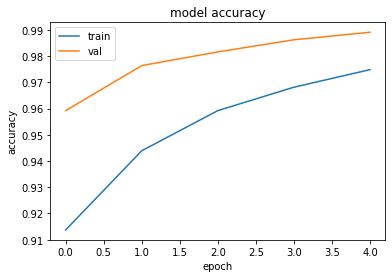

<Figure size 432x288 with 0 Axes>

In [11]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("performance_cifar10.png")

**Analyzing performance**

**training model**

In [12]:
score = model.evaluate(testInput, testLabel)
print('The model achieved a accuracy of %.2f%%.' % (score[1]*100))

10000/10000 [==============================] - 57s 6ms/sample - loss: 0.0339 - acc: 0.9891
The model achieved a accuracy of 98.91%.


**evaluating model performance**